<a href="https://colab.research.google.com/github/nagapriya1247/hello_world/blob/main/coded_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd

import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('/content/Epileptic Seizure Recognition.csv')
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [8]:
X=df.values


In [9]:
X=X[:,1:-1]


In [10]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [11]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)


X_train.shape
X_test.shape


(2300, 178, 1)

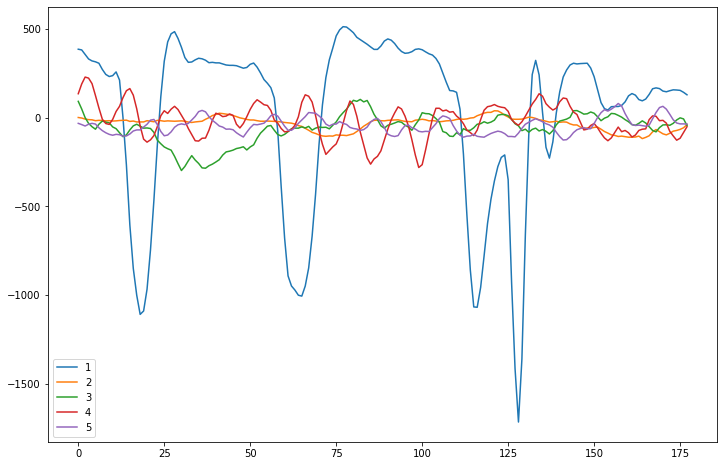

In [12]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

In [13]:
model = Sequential()
model.add(LSTM(56, input_shape=(45,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 45, 56)            12992     
                                                                 
 dropout (Dropout)           (None, 45, 56)            0         
                                                                 
 lstm_1 (LSTM)               (None, 56)                25312     
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense (Dense)               (None, 20)                1140      
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:

import numpy as np
 

X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.array(Y_train)

hist = model.fit(X_train[:,::4],Y_train[:,1:],epochs = 50, batch_size=15)

Epoch 1/50
614/614 [==============================] - 23s 31ms/step - loss: 0.3670 - accuracy: 0.5290
Epoch 2/50
614/614 [==============================] - 18s 30ms/step - loss: 0.2804 - accuracy: 0.6465
Epoch 3/50
614/614 [==============================] - 18s 30ms/step - loss: 0.2647 - accuracy: 0.6611
Epoch 4/50
614/614 [==============================] - 19s 31ms/step - loss: 0.2556 - accuracy: 0.6729
Epoch 5/50
614/614 [==============================] - 19s 31ms/step - loss: 0.2474 - accuracy: 0.6782
Epoch 6/50
614/614 [==============================] - 19s 30ms/step - loss: 0.2430 - accuracy: 0.6847
Epoch 7/50
614/614 [==============================] - 19s 31ms/step - loss: 0.2380 - accuracy: 0.6943
Epoch 8/50
614/614 [==============================] - 20s 32ms/step - loss: 0.2389 - accuracy: 0.6959
Epoch 9/50
614/614 [==============================] - 19s 31ms/step - loss: 0.2312 - accuracy: 0.7008
Epoch 10/50
614/614 [==============================] - 19s 31ms/step - loss: 0.227

In [16]:
model.save('Epilepsy.h5')

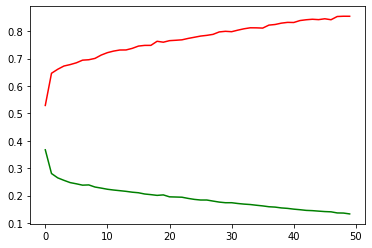

In [18]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['accuracy'],'r')
plt.show()

dict_keys(['loss', 'accuracy'])


KeyError: ignored

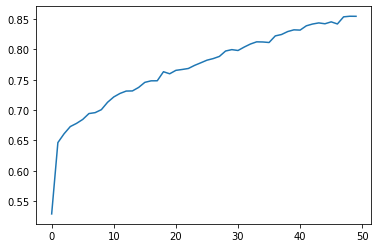

In [32]:
'''plt.figure(0)
plt.legend(hist.history['Validation'])
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()'''
'''
acc = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']'''
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')